<a href="https://colab.research.google.com/github/Urvi-M/BE559/blob/main/Homework1_part3_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1.3 (28 points)

**Learning objectives:**

In this assignment, we will refine our python skills and delve into hypothesis testing.  We will explore:

*   p-values
*   t-test variants
*   Statistical power

---
## Part 1 (2 points)
Load the same libraries that we used in *Homeworks 1.1 and 1.2*.

*   `numpy` (as `np`)
*   `matplotlib.pyplot` (as `plt`)
*   `scipy.stats` (as `stats`)

Now is also a good time to set the default font size to 16.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams.update({'font.size': 16})

---
##Part 2 (2 points)

Lets further examine key features of statistical tests, using the t-test from *Homework 1.2* as an example.  We'll start by examining the p-value.

*   Create a standard normal distribution and draw 20 samples
*   Use a t-test to determine the probability of drawing a sample from a standard normal distribution with a mean at least as far from zero as the measured mean (the p-value) using `stats.ttest_1samp`.  Make sure you set `alternative='two-sided` so that we can test whether our test statistic (the sample mean) is either larger **or** smaller than the hypothesized mean (zero).
*   Repeat this procedure 5000 times and create numpy arrays that contain all of the t statistics (in a variable called `tstats`) and p-values (`pvals`)
*   Plot a histogram of `pvals`.

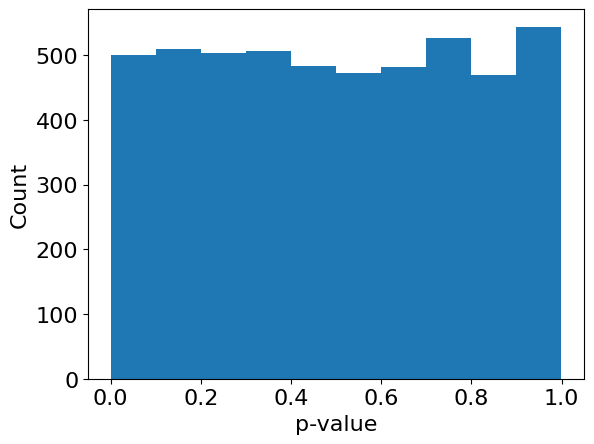

In [17]:
pvals = np.zeros(5000)
tstats = np.zeros(5000)
for i in range(5000):
  dist = np.random.normal(0,1,20)
  tstats[i],pvals[i]= stats.ttest_1samp(dist,popmean=0,alternative='two-sided')
plt.hist(pvals)
plt.xlabel('p-value')
plt.ylabel('Count')
plt.show()

---
##Part 3 (2 points)

Lets take a closer look at those p-values.
*   Plot `pvals` versus `tstats`.  Make a scatter plot where every data point is indicated by a black dot.
*   Repeat this plot on a second axis, but use `semilogy` instead of `plot` to produce a plot with a logarithmic y-axis.


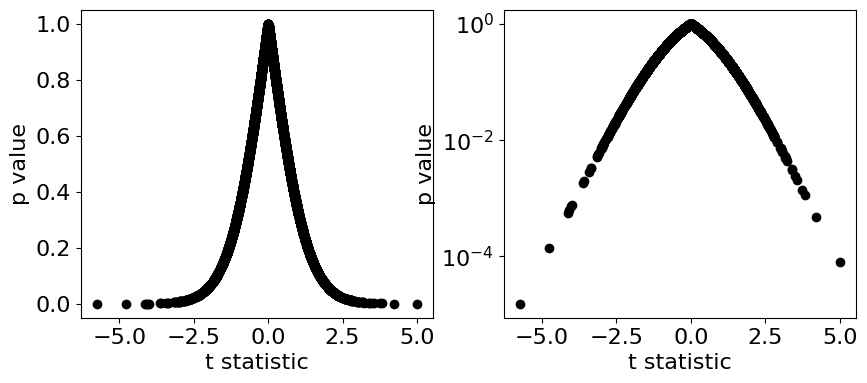

In [18]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
axs[0].scatter(tstats,pvals,color='k')
axs[0].set_xlabel('t statistic')
axs[0].set_ylabel('p value')

axs[1].scatter(tstats,pvals,color='k')
axs[1].set_yscale('log')
axs[1].set_xlabel('t statistic')
axs[1].set_ylabel('p value')

plt.show()

Here, you should see that samples with means more different than 0 are associated with smaller p-values.  

The p-value represents the probability of your data having been observed under the null hypothesis of the test.  In this case, the null hypothesis is that the data were drawn from a distribution with mean 0.

Samples with means near zero are likely to have been drawn from a zero-mean distribution.  Samples with means more different than zero are less likely to be observed under the null hypothesis and have smaller p-values.

---
##Part 4 (2 points)

How often are particular p-values obtained by chance?

*   Calculate the proportion of entries in `pvals` less than 0.05.


In [19]:
prop =np.sum(pvals < 0.05)/np.size(pvals)
print(f'The proportion of pvals less than 0.05 is {prop:2f}')

The proportion of pvals less than 0.05 is 0.048000


You should fine that p-values less than 0.05 are obtained about 5% of the time.

Here, we know the null hypothesis - that our data were randomly selected from a zero-mean distribution - is true.  We expect small (less than 0.05)  p-values relatively rarely (5% of the time).  

**The p-value is the probability of observing a result as extreme or more extreme under the assumption that the null hypothesis is true.**

For example, a p-value of 0.05 indicates that 5% of the time we expect to observe a sample mean at least that different from the hypothesized mean of zero.  A p-value of 0.001 would indicate a very rare event - one that happens with 1/1000 odds - under the assumptions of the null hypothesis.

Low p-values indicate that the null hypothesis may not be correct.


##Part 5 (2 points)

Let's examine other variations of the t-test.

*   Repeat **Part 2**, but instead use `stats.ttest_1samp` to test whether each random sample has a mean less than zero by setting `alternative='less'`. This is called a *left-tailed test* because we are testing whether our test statistic lies in the left tail of the null distribution.
*   Repeat **Part 2** and test whether the mean of each random sample is greater than zero (right-tailed test). This is called a *right-tailed test*.
*   Plot `pvals` versus `tstats` as in **Part 3** in each case using `semilogy`.  Plot them on the same axes in different colors with an appropriate legend.

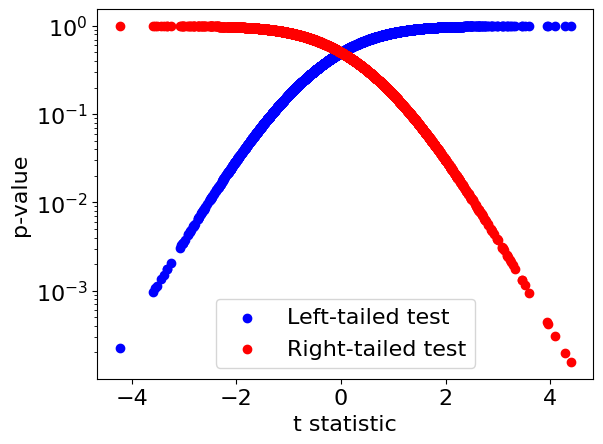

In [28]:
pvalsl = np.zeros(5000)
tstatsl = np.zeros(5000)
pvalsr = np.zeros(5000)
tstatsr = np.zeros(5000)
for i in range(5000):
  dist = np.random.normal(0,1,20)
  tstatsl[i],pvalsl[i]= stats.ttest_1samp(dist,popmean=0,alternative='less')
  tstatsr[i],pvalsr[i]= stats.ttest_1samp(dist,popmean=0,alternative='greater')
plt.scatter(tstatsl,pvalsl,color='b',label='Left-tailed test')
plt.scatter(tstatsr,pvalsr,color='r',label='Right-tailed test')
plt.yscale('log')
plt.xlabel('t statistic')
plt.ylabel('p-value')
plt.legend(loc='lower center')
plt.show()

In all cases, the p-value tells you the probability of observing an outcome under the assumption that the null hypothesis is true.  

 1-p is the probability of the opposite outcome.  Here,the **null hypotheses** are:

*   Two-sided test:  The sample was drawn from a distribution with **mean 0**.
*   Left-tailed test: The sample was drawn from a distribution with **mean 0 or greater**
*   Right-tailed test: The sample was drawn from a distribtuion with **mean 0 or less**.


##Part 6 (2 points)

Repeat **Parts 2-4**, but compare your data to a distribution with mean 0.5 (instead of zero) using the same procedure

The proportion of pvals less than 0.05 is 0.559400
The proportion of pvals greater than 0.95 is 0.004400


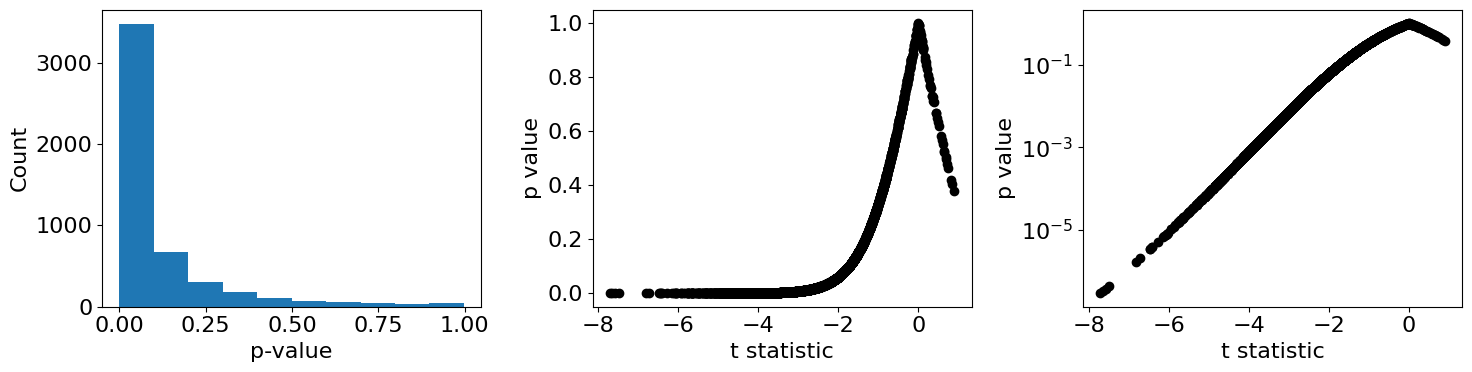

In [21]:
pvals = np.zeros(5000)
tstats = np.zeros(5000)
for i in range(5000):
  dist = np.random.normal(0,1,20)
  tstats[i],pvals[i]= stats.ttest_1samp(dist,popmean=0.5,alternative='two-sided')

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(15,4)
plt.rcParams.update({'font.size': 16})
axs[0].hist(pvals)
axs[0].set_xlabel('p-value')
axs[0].set_ylabel('Count')
axs[1].scatter(tstats,pvals,color='k')
axs[1].set_xlabel('t statistic')
axs[1].set_ylabel('p value')

axs[2].scatter(tstats,pvals,color='k')
axs[2].set_yscale('log')
axs[2].set_xlabel('t statistic')
axs[2].set_ylabel('p value')
plt.tight_layout()

propl =np.sum(pvals < 0.05)/np.size(pvals)
propr =np.sum(pvals >= 0.95)/np.size(pvals)
print(f'The proportion of pvals less than 0.05 is {propl:2f}')
print(f'The proportion of pvals greater than 0.95 is {propr:2f}')

In many instances, we calculate a p-value < 0.05, which indicates that the random sample was likely drawn from a distribution with a **mean different than 0**, as expected.

**But not always!** Sometimes we still select samples with associated p-values that are large, indicating that the null hypothesis cannot be rejected.  This indicates a **Type II error**  - failing to reject a false null hypothesis.  This is also called a **false negative**.

The type II erorr rate is closely related to the **statistical power** of a test - its ability (or inability) to correctly reject a null hypothesis when an alternative hypothesis is actually true.

We will examine statistical power a little more below.

##Part 7 (2 points)

*  Repeat **Part 6** but run a left-tailed t-test for each sample instead of a two sided test.  
*  Calculate the proportion of samples with associated p-values less than 0.05.
*  Compare this proportion to the proportion of p-values less than 0.05 when you used the two-sided test

In [22]:
pvalsl = np.zeros(5000)
tstatsl = np.zeros(5000)
for i in range(5000):
  dist = np.random.normal(0,1,20)
  tstatsl[i],pvalsl[i]= stats.ttest_1samp(dist,popmean=0.5,alternative='less')
prop = np.sum(pvalsl < 0.05)/np.size(pvalsl)
print(f'Left-tailed test: The proportion of pvals less than 0.05 is {prop:2f}')
print(f'Two-sided test: The proportion of pvals less than 0.05 is {propl:2f}')

Left-tailed test: The proportion of pvals less than 0.05 is 0.683400
Two-sided test: The proportion of pvals less than 0.05 is 0.559400


Here, you should find a larger proportion of p-values less than  0.05 using the left-tailed test.


<font color='red'>**SHORT ANSWER (2 points):** Explain why the left-tailed test yields a p-value less than 0.05 (correctly rejects the null hypothesis) more frequently than the two-sided test in terms of the area under the probability density function of the t-statistic.</font>

The left-tailed test makes more specific claims regarding the test of the value with respect to the mean as compared to a two-tailed test. We test whether a value is significantly "lesser" vs "different". Therefore the t-distribution for the former considers only one tail of the curve while  the latter accounts for both tails. the area under the left tail is smaller and denser comapred to the two-sided test. So, it correctly rejects the null hypothesis more frequently than the two-sided test.

##Part 8 (2 points)

Next, let's examine how stastical power changes as a function of sample size.


*   Run the same experiment as above with several variations.  Create a standard normal distribution and draw samples of size 4, 8, 16, 32, 64, 128, and 256.
*   Use a t-test  (`stats.ttest_1samp`) to test two null hypotheses: (1) that the data were drawn from a distribution with mean 0.5 and (2) that the data were drawn from a distribution with mean 0.25.
*   Repeat the steps above 500 times (you will need to use two nested `for` loops).
*   For each case, calculate the proportion of p-values less than 0.05.
*   Plot the proportion of p-values less than 0.05 vs. the sample size (true positive rate) with a logarithmic x-axis.
*  On the same axes, plot the false negative rate.
*  Choose iine styles that ensure the lines are easily distinguishable





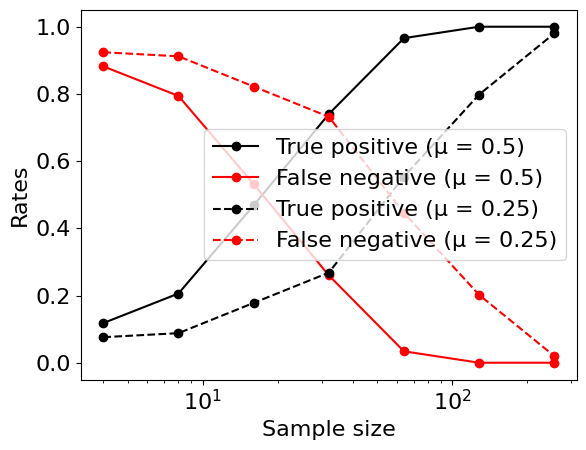

In [23]:
n=[4,8,16,32,64,128,256]
iti =500
tp1 = np.zeros(len(n))
tp2 = np.zeros(len(n))
fn1 = np.zeros(len(n))
fn2= np.zeros(len(n))
for i in range(len(n)):
  pvals1 = np.zeros(iti)
  tstats1 = np.zeros(iti)
  pvals2 = np.zeros(iti)
  tstats2 = np.zeros(iti)
  for j in range(iti):
    Dist=np.random.normal(loc=0,scale=1,size=n[i])
    tstats1[j],pvals1[j]= stats.ttest_1samp(Dist,popmean=0.5,alternative='two-sided')
    tstats2[j],pvals2[j]= stats.ttest_1samp(Dist,popmean=0.25,alternative='two-sided')
  tp1[i] = np.sum(pvals1 < 0.05) / (np.size(pvals1))
  fn1[i] = np.sum(pvals1 >= 0.05) / (np.size(pvals1))
  tp2[i] = np.sum(pvals2 < 0.05) / (np.size(pvals2))
  fn2[i] = np.sum(pvals2 >= 0.05) / (np.size(pvals2))


plt.semilogx(n,tp1,'ko-', label = 'True positive (\u03BC = 0.5)')
plt.semilogx(n,fn1,'ro-', label = 'False negative (\u03BC = 0.5)')
plt.semilogx(n,tp2,'ko--', label = 'True positive (\u03BC = 0.25)')
plt.semilogx(n,fn2,'ro--', label = 'False negative (\u03BC = 0.25)')
plt.xlabel('Sample size')
plt.ylabel('Rates')
plt.legend()
plt.show()

Here, you should see that the true positive rate increases and the false negative rate decrease as the sample size increases.  

In this example, we are drawing samples from a mean-zero distribution and testing the hypothesis that the were drawn from distributions with mean 0.25 and mean 0.5.  In all cases, the null hypothesis is false.  We are more likely to reject the null hypothesis as the sample size increases (and our sample mean converges to the population mean) and as the effect size (difference between the actual population mean and the hypothesized population mean) increases.

Increasing sample size and/or effect size increases **statistical power**, the probability of correctly rejecting an incorrect null hypothesis (black lines above).



---



Thus far, we have examined one-sample t-tests, where we attempt to determine whether one sample of data was drawn from a distribution with a hypothesized mean.

Next, we will examine a **two-sample test**, where we will compare two samples of data and determine whether they were likely drawn from the same distribution.  There are several flavors of the two-sample t-test.  

We'll start with the simplest version, when the size of each sample is the same, and when we draw the two samples from populations that we assume to have the same (or similar) standard deviations.  In this case the test statistic (still called t) is:

${\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}{\sqrt {\frac {2}{n}}}}}}$

Where

${\displaystyle s_{p}={\sqrt {\frac {s_{X_{1}}^{2}+s_{X_{2}}^{2}}{2}}}}$

and $s_{X_{1}}^{2}$, $s_{X_{2}}^{2}$ are the unbiased (divide by $n-1$ rather than $n$) estimates of the sample variances.

Our test statistic, *t*, still follows the same t distribution we examined in *Homework 1.2*.

When the two samples have different sizes, or different variances, the analytical expression for t becomes a bit more complex.


##Part 9 (2 points)

Here, we will only calculate a two-sample t-test using `scipy.stats`, although we could use the analytical expressions above (along with the expression for the PDF of the t distribution) to determine p-values directly if we so chose.

*  Draw 20 samples from a normal distribution with mean 0 and standard deviation 1 (Sample 1) and an additional 20 samples from a distribution with mean 0.5 and standard deviation 1 (Sample 2).
*  Use `scipy.stats.ttest_ind` to determine the probability that these samples were drawn from distributions with the same mean (the p-value for a two-sided test).
*  In addition, use `scipy.stats.ttest_1samp` to test whether Sample 1 was drawn from a distribution with mean 0.5 using a two-sided test.  Record the p-value for this test as well.
*  Repeat these steps 5000 times.
*  For each case, calculate the proportion of p-values less than 0.05.


In [24]:
iti=5000
pval1 = np.zeros(iti)
tstat1 = np.zeros(iti)
pval2 = np.zeros(iti)
tstat2 = np.zeros(iti)
for i in range(iti):
  samp1= np.random.normal(0,1,20)
  samp2= np.random.normal(0.5,1,20)
  tstat1[i],pval1[i] = stats.ttest_ind(samp1,samp2)
  tstat2[i],pval2[i] = stats.ttest_1samp(samp1,0.5)
prop1 = np.sum(pval1 < 0.05) / (np.size(pval1))
prop2 = np.sum(pval2 < 0.05) / (np.size(pval2))
print(f'proportion of pvalues less than 0.05 for the t-test for two indepenent samples = {prop1:2f}')
print(f'proportion of pvalues less than 0.05 for the t-test for one sample compared to 0.5 = {prop2:2f}')

proportion of pvalues less than 0.05 for the t-test for two indepenent samples = 0.340200
proportion of pvalues less than 0.05 for the t-test for one sample compared to 0.5 = 0.579400


<font color='red'>**SHORT ANSWER (2 points):** Which test has greater statistical power?  Explain why. When would you use one test versus the other?</font>

The two sample t-test has greater statistical power as the pvalue for the test is closer to 0. It also accounts for the sample standard deviation for both samples making the calculation more robust. We use the two samples when both samples are being comapred with each otehr versus in the one sample test where one sample is compared against a population mean.

##Part 10 (2 points)

In **Part 9** we examined a two-sample t-test using `scipy.stats.ttest_ind`.  There, 'ind' refers to a test of independent measurements.  That is, selecting a particular value in Sample 1 does not affect the values expected in Sample 2.

Next, we will examine paired samples and the associated paired t-test.  

For example, suppose we measure how long it takes 20 subjects to run a 5K race, subject them to a training regimine, and then measure how long it takes them to run a second 5K to determine if the training regimine reduces their 5K time.  

In this case, the samples are paired.  Exactly one measurement in Sample 1 and one measurement in Sample 2 correspond to each subject. Each person's first 5K time might tell us something about what to expect from their second 5K time.  We do not have two independent samples from the population of 5K times in this case.

Let's simulate this scenario and visualize the experiment using some new kinds of plots.
*   Load the datafile located at the following URL using `np.genfromtxt` into a variable called `raceData`:

https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework1/RaceData.csv

*   Create variables called `race1` and `race2` from the first and second columns of `raceData`.
*   Compare these two datasets with a boxplot.
*   Use `scipy.stats.ttest_ind` to calculate the probability that these two datasets were drawn from populations with the same mean.
*   Plot a scatterplot of `race2` vs. `race1`.  You should see that these two samples are  clearly correlated and, thus, not independent.  Include a dotted line indicating where y=x.
*   Display the paired data with lines connecting paired data points (as shown below).   




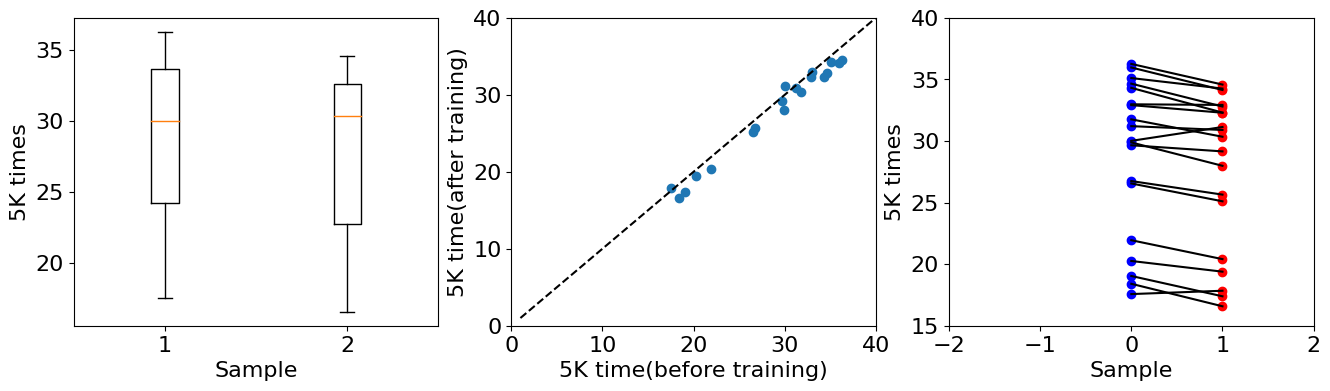

In [25]:
raceData = np.genfromtxt('https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework1/RaceData.csv',delimiter=',',skip_header=1)
race1 = raceData[:,0]
race2 = raceData[:,1]

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(16,4)
plt.rcParams.update({'font.size': 16})

axs[0].boxplot(raceData)
axs[0].set_xlabel('Sample')
axs[0].set_ylabel('5K times')

t_stat, p_val = stats.ttest_ind(race1, race2)

axs[1].scatter(race1,race2)
axs[1].plot([1, 40], [1, 40], 'k--')# to plot a line its ([x1,x2],[y1,y2])
axs[1].set_xlim(0,40)
axs[1].set_ylim(0,40)
axs[1].set_xlabel('5K time(before training)')
axs[1].set_ylabel('5K time(after training)')



x = race1-race1
y = np.ones(len(race2))

axs[2].scatter(x, race1, color='blue')
axs[2].scatter(y, race2,color='red')
for i in range(len(race1)):
  axs[2].plot([x[i],y[i]], [race1[i], race2[i]], c='k') # to plot a line its ([x1,x2],[y1,y2])
axs[2].set_xlim(-2, 2)
axs[2].set_ylim(15, 40)
axs[2].set_xlabel('Sample')
axs[2].set_ylabel('5K times')

plt.show()

Here, from the boxplots, you should see that the distributions of the data are quite similar.  In the second and third plots, however, you should see a systematic change in the paired measurements in the first and second samples.

How do we test whether the training regimine had the desired effect on 5K times?  We'll compare two kinds of tests below

##Part 11 (2 points)

*   Apply the upaired two-sample t-test as in **Part 8**.  Report the p-value.
*   Apply a **paired t-test** (`stats.ttest_rel`) to these two samples as well.  Report this p-value as well.

In [26]:
t_stat,p_val1 = stats.ttest_ind(race1,race2)
print(f'Unpaired t-test p-value = {p_val1:2f}')
t_stat,p_val2 = stats.ttest_rel(race1,race2)
print(f'Paired t-test p-value = {p_val2:2f}')

Unpaired t-test p-value = 0.610454
Paired t-test p-value = 0.000045


These two tests should yield very different results.  Why is this?

While ostensibly a two-sample test, the paired t-test is really a test of the differences between the paired samples (i.e. the values of `race2-race1`).

  While `race1` and `race2` have similar means and variances, the differences have a mean that can be confidently differentiated from zero.

We can see this clearly by plotting a histogram of the differences, the values of `race2-race1`.

##Part 12 (2 points)

*   Plot a histogram of the values of `race2-race1`, the changes in each individuals 5K time.


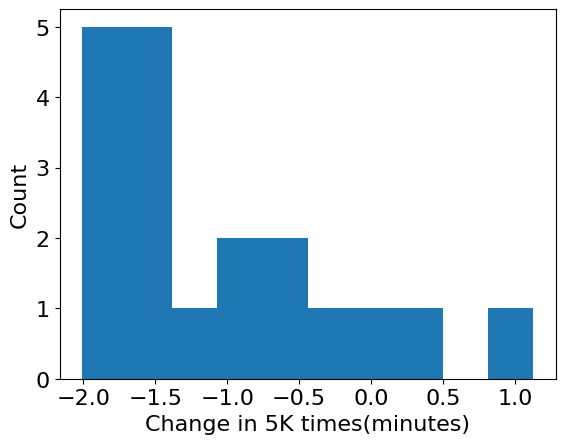

In [27]:
p=race2-race1
plt.hist(p)
plt.xlabel('Change in 5K times(minutes)')
plt.ylabel('Count')
plt.show()

The values of `race2-race1` appear unlikely to have been drawn from a distribution with a mean different than zero, indicating a change in race times, even though the values in `race1` and `race2` follow similar distributions.

Here, the paired t-test is really a one-sample t-test where we are comparing the difference in values between `race1` and `race2` with a hypothesized mean of zero.  That is, the null hypothsis is that the values in `race2-race` are drawn from a distribution that is zero mean.  